# Vergleich 1. Version & 2. Version

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random as rn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
signs = ["fist", "telephone", "V", "Hand"]
p = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\paths.csv"
p_test = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\test.csv"
befor = len(pd.read_csv(p))/len(signs) # wie viele fotos pro zeichen es schon im ordner gibt
befor_test = len(pd.read_csv(p_test))/len(signs)
img_size = (100, 100,3)



In [3]:
#get images   uuubberprüfen
def img_gen(path, size):
    img = Image.open(path)
    #img = img.resize(size, Image.ANTIALIAS) vorher schon gmeacht
    img = np.array(img) / 255
    return img



def mapping(arr):
    map = lambda t: img_gen(t, img_size)
    res = np.array([map(i) for i in arr])
    return res



In [4]:
data = pd.read_csv(p)
data = data.iloc[np.random.permutation(data.index)].reset_index(drop=True)
x_train = mapping(np.array(data["paths"]))
y_train = np.array(tf.one_hot(np.array(data["signs"]), len(signs)))

data_test = pd.read_csv(p_test)
data_test = data_test.iloc[np.random.permutation(data_test.index)].reset_index(drop=True)
x_test = mapping(np.array(data_test["paths"]))
y_test = np.array(tf.one_hot(np.array(data_test["signs"]), len(signs)))


plot some samples

In [ ]:
w, h = 10, 10 
fig = plt.figure(figsize=(9, 13))
plt.title("some pictures")
columns, rows = 4, 5




ax = []

for i in range(columns*rows):
    img = x_train[i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(str(signs[np.argmax(y_train[i])]))  
    plt.imshow(img)
 


In [5]:
def ploting(history, name):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(name)

    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper left')

# "Loss"
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


def conf_matrix(modelx, name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(name)

    y_true = [np.argmax(i) for i in y_train[:400]]	
    y_pred = [np.argmax(i) for i in modelx(x_train[:400])]

    y_true_val = [np.argmax(i) for i in y_test[:400]]
    y_pred_val = [np.argmax(i) for i in modelx(x_test[:400])]


    cm = confusion_matrix(y_true, y_pred)
    cm2 = confusion_matrix(y_true_val, y_pred_val)

    # Create a confusion matrix display object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues, ax= ax1)#, ax=ax)
    ax1.set_title("Confusion Matrix train model1")



    disp2.plot(cmap=plt.cm.Blues, ax=ax2)
    ax2.set_title("Confusion Matrix test model1")


    plt.tight_layout()
    plt.show()

# 1. Version

Epoch 1/30
1115/1115 [==============================] - 4s 3ms/step - loss: 0.5662 - accuracy: 0.2668 - val_loss: 0.5597 - val_accuracy: 0.2676
Epoch 2/30
1115/1115 [==============================] - 3s 3ms/step - loss: 0.5574 - accuracy: 0.3105 - val_loss: 0.5580 - val_accuracy: 0.2529
Epoch 3/30
1115/1115 [==============================] - 3s 3ms/step - loss: 0.5438 - accuracy: 0.3670 - val_loss: 0.5488 - val_accuracy: 0.3029
Epoch 4/30
1115/1115 [==============================] - 3s 3ms/step - loss: 0.5240 - accuracy: 0.4188 - val_loss: 0.5278 - val_accuracy: 0.3485
Epoch 5/30
1115/1115 [==============================] - 3s 3ms/step - loss: 0.4897 - accuracy: 0.4926 - val_loss: 0.5225 - val_accuracy: 0.3853
Epoch 6/30
1115/1115 [==============================] - 3s 3ms/step - loss: 0.4454 - accuracy: 0.5682 - val_loss: 0.4896 - val_accuracy: 0.5118
Epoch 7/30
1115/1115 [==============================] - 3s 3ms/step - loss: 0.3936 - accuracy: 0.6414 - val_loss: 0.4899 - val_accuracy:

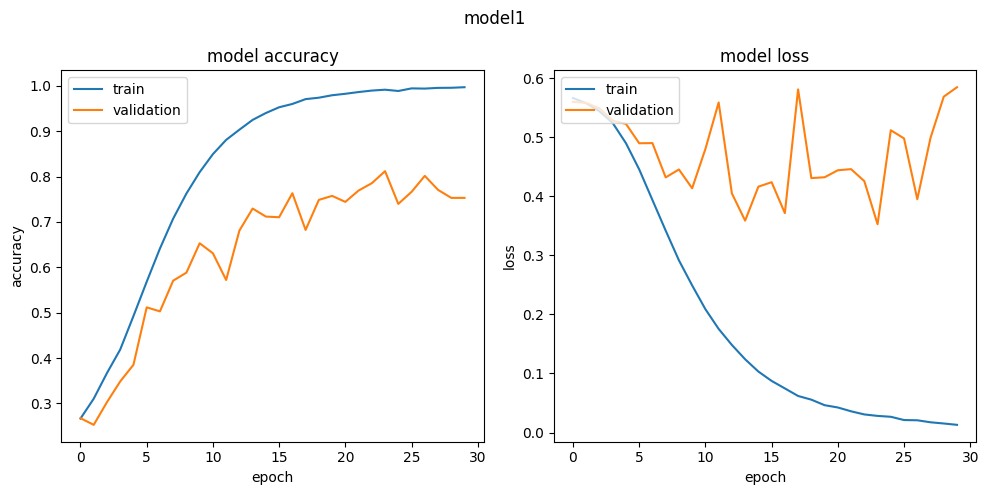

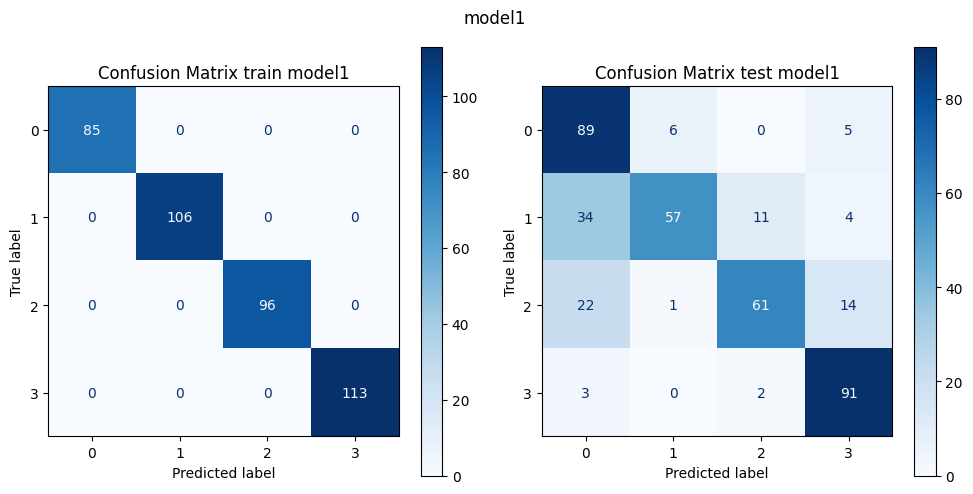

In [8]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3), padding="same", activation="relu", input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),



    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(signs), activation='softmax')
])

model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


history1 = model1.fit(x=x_train[:9000], y=y_train[:9000],
 epochs=30,
 batch_size=8,
 validation_data=(x_test, y_test)
 )

ploting(history1, "model1")
conf_matrix(model1, "model1")


# 1. Version mit Grossen Filtern

Epoch 1/30
1115/1115 [==============================] - 7s 6ms/step - loss: 0.5736 - accuracy: 0.2526 - val_loss: 0.5632 - val_accuracy: 0.2500
Epoch 2/30
1115/1115 [==============================] - 7s 6ms/step - loss: 0.5675 - accuracy: 0.2591 - val_loss: 0.5629 - val_accuracy: 0.2500
Epoch 3/30
1115/1115 [==============================] - 7s 6ms/step - loss: 0.5666 - accuracy: 0.2437 - val_loss: 0.5627 - val_accuracy: 0.2765
Epoch 4/30
1115/1115 [==============================] - 7s 6ms/step - loss: 0.5647 - accuracy: 0.2590 - val_loss: 0.5631 - val_accuracy: 0.2485
Epoch 5/30
1115/1115 [==============================] - 7s 6ms/step - loss: 0.5646 - accuracy: 0.2504 - val_loss: 0.5627 - val_accuracy: 0.2500
Epoch 6/30
1115/1115 [==============================] - 7s 6ms/step - loss: 0.5645 - accuracy: 0.2570 - val_loss: 0.5627 - val_accuracy: 0.2500
Epoch 7/30
1115/1115 [==============================] - 7s 6ms/step - loss: 0.5641 - accuracy: 0.2563 - val_loss: 0.5621 - val_accuracy:

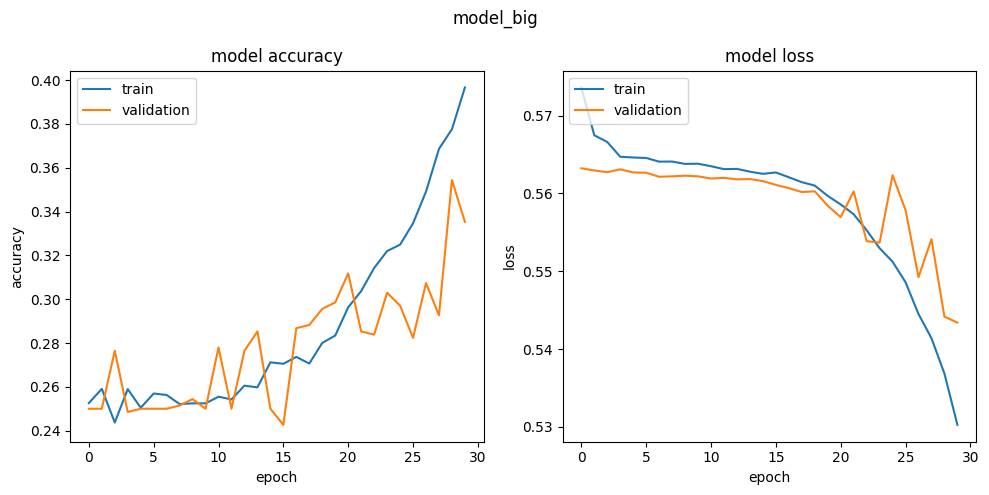

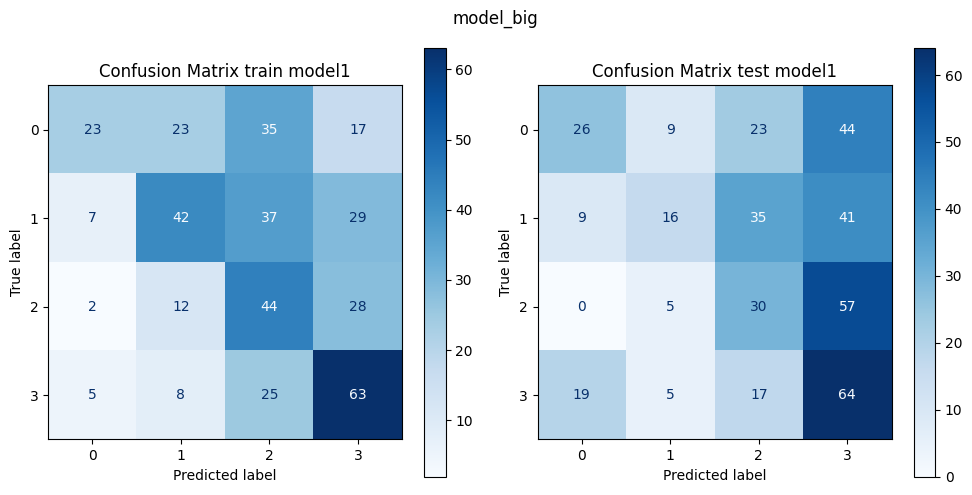

In [7]:
model_big = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (10,10), padding='same', activation="relu",input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((5, 5), strides=2),

    tf.keras.layers.Conv2D(32, (12,12), padding='same',activation="relu"),
    tf.keras.layers.MaxPooling2D((5, 5), strides=2),
    tf.keras.layers.Conv2D(32, (15,15), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((5, 5), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(signs), activation="softmax")])

model_big.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model

#model.fit(x_train, y_train, epochs=15, batch_size=8)

history_big = model_big.fit(x=x_train[:9000], y=y_train[:9000],
                    epochs=30,
                    batch_size=8,
                    validation_data=(x_test, y_test)
                    )

ploting(history_big, "model_big")
conf_matrix(model_big, "model_big")

# 2. Version (Filtergrössen angepasst)

Epoch 1/30
1115/1115 [==============================] - 5s 4ms/step - loss: 0.5686 - accuracy: 0.2636 - val_loss: 0.5610 - val_accuracy: 0.2618
Epoch 2/30
1115/1115 [==============================] - 5s 4ms/step - loss: 0.5634 - accuracy: 0.2778 - val_loss: 0.5584 - val_accuracy: 0.2956
Epoch 3/30
1115/1115 [==============================] - 5s 4ms/step - loss: 0.5590 - accuracy: 0.2979 - val_loss: 0.5534 - val_accuracy: 0.2706
Epoch 4/30
1115/1115 [==============================] - 5s 4ms/step - loss: 0.5511 - accuracy: 0.3404 - val_loss: 0.5457 - val_accuracy: 0.3176
Epoch 5/30
1115/1115 [==============================] - 5s 4ms/step - loss: 0.5367 - accuracy: 0.3881 - val_loss: 0.5405 - val_accuracy: 0.3353
Epoch 6/30
1115/1115 [==============================] - 5s 4ms/step - loss: 0.4923 - accuracy: 0.4870 - val_loss: 0.4511 - val_accuracy: 0.5647
Epoch 7/30
1115/1115 [==============================] - 4s 4ms/step - loss: 0.4123 - accuracy: 0.6103 - val_loss: 0.3835 - val_accuracy:

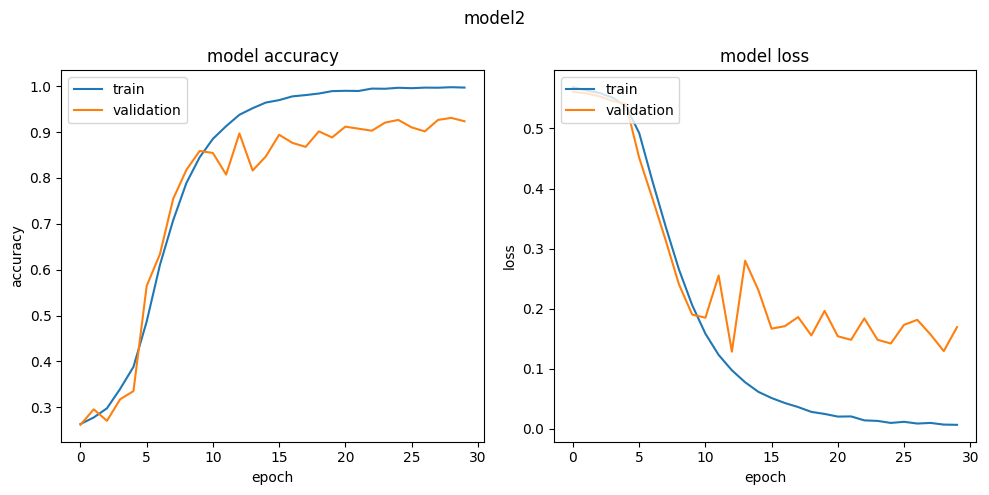

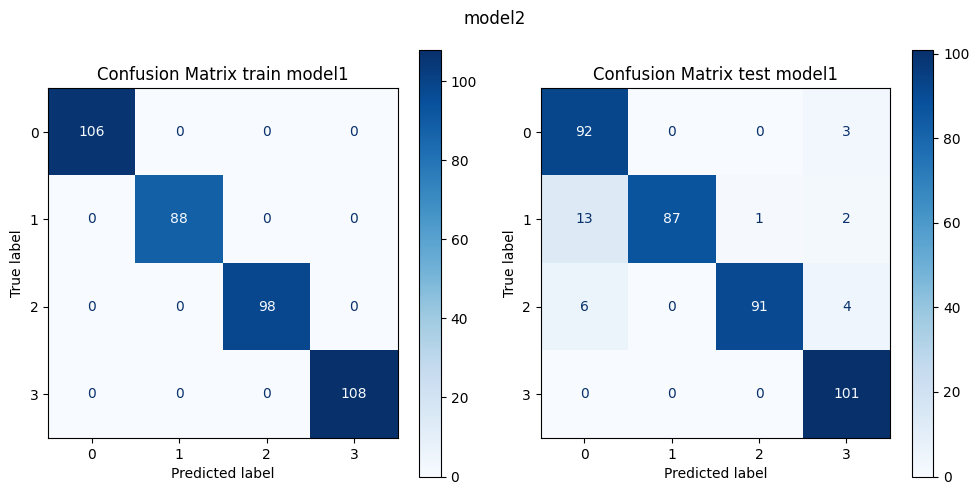

In [45]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(32, (5,5), padding='same',activation="relu"),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),


    tf.keras.layers.Conv2D(32, (9,9), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(signs), activation="softmax")
]
)
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])




history2 = model2.fit(x=x_train[:9000], y=y_train[:9000],
                    epochs=30,
                    batch_size=8,
                    validation_data=(x_test, y_test))

ploting(history2, "model2")
conf_matrix(model2, "model2")